In [231]:
# importando as bibliotecas
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot  as plt
import seaborn as sns

In [232]:
# Definindo a base de dados
dados = 'dados_produtos.csv'

In [233]:
# Lendo as informações
df = pd.read_csv(dados)

In [234]:
print(df.all)

<bound method NDFrame._add_numeric_operations.<locals>.all of    product_name  rating  rating_count  purchased
0     Televisão    3.04            29          1
1       Celular    3.46          3872          0
2     Cafeteira    3.25          1187          0
3     Televisão    3.77          4097          1
4     Videogame    5.00          4738          1
..          ...     ...           ...        ...
95         iPod    4.44          1372          0
96      Celular    4.66          1690          1
97    Televisão    4.33          3364          1
98     Notebook    3.30          1825          1
99         iPod    4.08           533          0

[100 rows x 4 columns]>


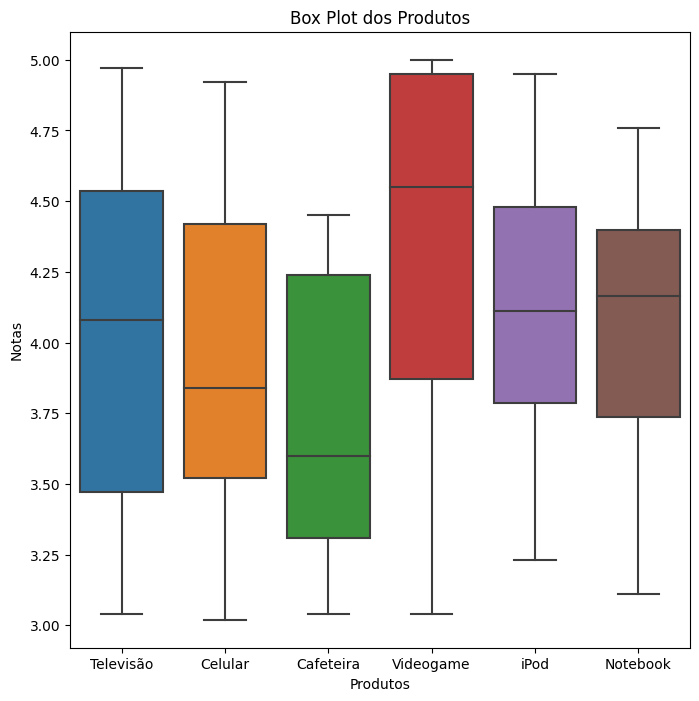

In [235]:
# Criando o box plot
plt.figure(figsize=(8, 8))
sns.boxplot(x='product_name', y='rating', data=df)
plt.title('Box Plot dos Produtos')
plt.ylabel('Notas')
plt.xlabel('Produtos')
plt.show()


In [236]:
#Informações 
df.info(dados)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  100 non-null    object 
 1   rating        100 non-null    float64
 2   rating_count  100 non-null    int64  
 3   purchased     100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.2+ KB


In [237]:
#Visão resumida dos dados 
df.describe

<bound method NDFrame.describe of    product_name  rating  rating_count  purchased
0     Televisão    3.04            29          1
1       Celular    3.46          3872          0
2     Cafeteira    3.25          1187          0
3     Televisão    3.77          4097          1
4     Videogame    5.00          4738          1
..          ...     ...           ...        ...
95         iPod    4.44          1372          0
96      Celular    4.66          1690          1
97    Televisão    4.33          3364          1
98     Notebook    3.30          1825          1
99         iPod    4.08           533          0

[100 rows x 4 columns]>

In [238]:
#Remover dados duplicados
df = df.drop_duplicates()

In [239]:
#Remover linhas com dados faltando
df = df.dropna()

In [240]:
#Informações sobre o dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  100 non-null    object 
 1   rating        100 non-null    float64
 2   rating_count  100 non-null    int64  
 3   purchased     100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.2+ KB
None


In [241]:
# Separar features e target
X = df[['rating', 'rating_count']]
y = df[['purchased']]

In [242]:
# Dividindo o conjunto de dados em treinamento (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42)

0.35 [[ 3  2]
 [11  4]]


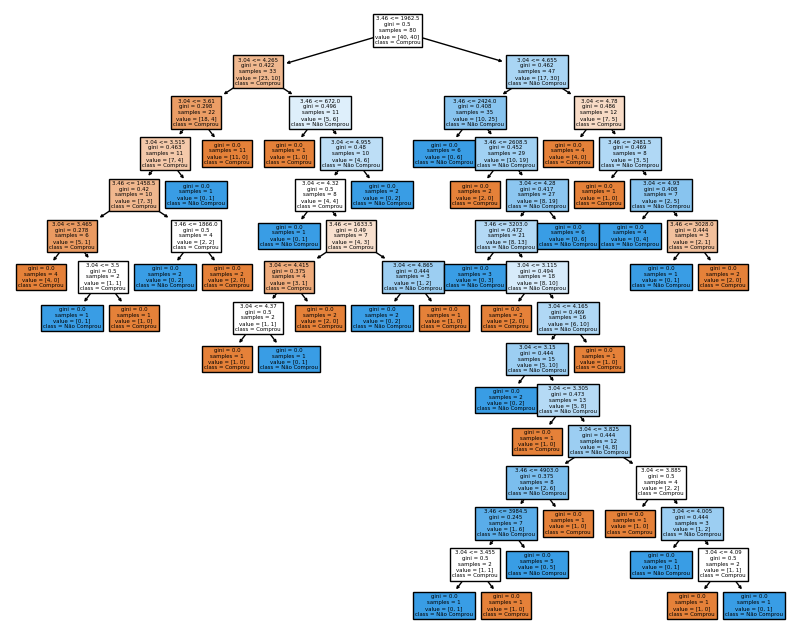

In [243]:

x=df[['rating', 'rating_count']] # pega a coluna de tempo do dataframe
y=df['purchased'] # pega a coluna de classificação do dataframe 
x_treino,x_teste,y_treino,y_teste = train_test_split(x,y,
                                                     test_size=0.2,random_state=42)
model = DecisionTreeClassifier()
model.fit(x_treino,y_treino)
prev = model.predict(x_teste)
acurracy = accuracy_score(y_teste,prev)
matrix = confusion_matrix(y_teste,prev)
print(acurracy, matrix)
df['purchased'] = df['purchased'].replace([1, 0], ['Comprou', 'Não Comprou'])
fig = plt.figure(figsize=(10,8))
tree.plot_tree(model,feature_names=df['rating'].tolist(),class_names=df['purchased'].tolist(),filled=True)
plt.show()

In [244]:
# 
produtos = df['product_name'].unique()  # Obtém a lista de produtos únicos

for produto in produtos:
    # Filtra os dados para o produto atual
    df_produto = df[df['product_name'] == produto]
    
    if len(df_produto) == 0:  # Ignora se não houver dados para o produto
        continue
    
    x = df_produto[['rating', 'rating_count']]  # Features
    y = df_produto['purchased']  # Target variable

In [245]:
# Supondo que df já esteja definido e tenha uma coluna 'product_name'
produtos = df['product_name'].unique()  # Obtém a lista de produtos únicos

In [246]:
# Criando e ajustando o modelo
model = DecisionTreeClassifier()
model.fit(x_treino, y_treino)

DecisionTreeClassifier()

In [247]:
# Fazendo previsões
prev = model.predict(x_teste)

In [248]:
# Avaliando o modelo
acurracy = accuracy_score(y_teste, prev)
matrix = confusion_matrix(y_teste, prev)
print(f"Produto: {produto} | Accuracy: {acurracy:.2f} | Confusion Matrix:\n{matrix}")

Produto: Notebook | Accuracy: 0.45 | Confusion Matrix:
[[2 3]
 [8 7]]


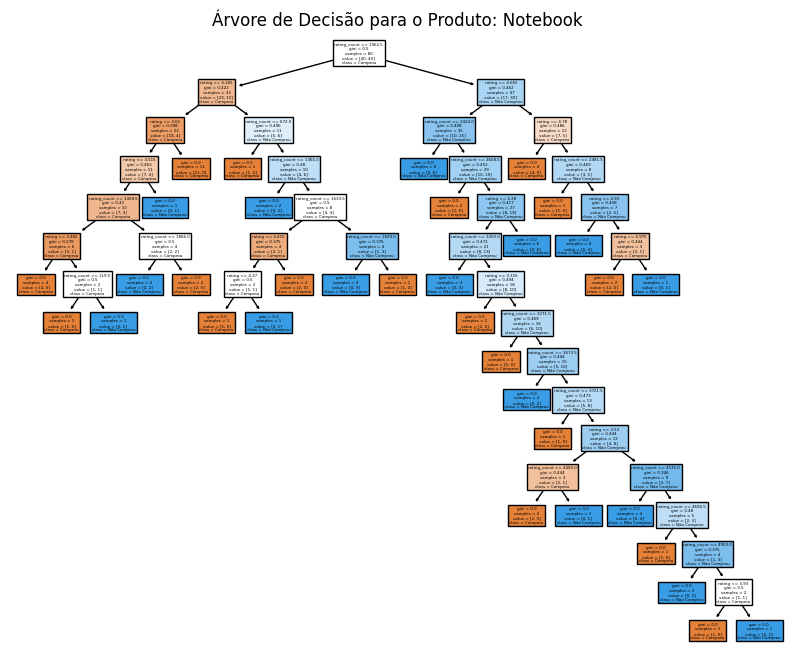

In [249]:
# Plotando a árvore de decisão
plt.figure(figsize=(10, 8))
tree.plot_tree(model, feature_names=x.columns.tolist(), class_names=['Comprou', 'Não Comprou'], filled=True)
plt.title(f'Árvore de Decisão para o Produto: {produto}')
plt.show()

In [250]:
products = df['product_name'].unique()

for product in products:

    print(f'\n--------------------------- Árvore de Decisão do Produto {product} ---------------------------------\n')
    
    product_df = df.loc[df['product_name'] == product]

    X = product_df.drop(['purchased', 'product_name'], axis=1)
    y = product_df['purchased']

    X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    dtc = DecisionTreeClassifier()
    model = dtc.fit(X_train, y_train)
    y_pred = dtc.predict(x_test)

    print('Avaliação do Modelo: \n')
    print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
    print(f'F1 Score: {f1_score(y_test, y_pred)}')
    print(f'Precision Score: {precision_score(y_test, y_pred)}')
    print(f'Recall Score: {recall_score(y_test, y_pred)}')
    print(f'Confusion Matrix: {confusion_matrix(y_test, y_pred)}')

    print('\nVisualização da Árvore:')

    product_df['purchased'] = product_df['purchased'].replace([1, 0], ['Comprou', 'Não Comprou'])
    
    fig = plt.figure(figsize=(10, 8))
    
    tree.plot_tree(model, feature_names=product_df['rating'].tolist(), class_names=product_df['purchased'].tolist(), filled= True)
    plt.title(f'Arvore decisão - {product}')


--------------------------- Árvore de Decisão do Produto Televisão ---------------------------------

Avaliação do Modelo: 

Accuracy Score: 0.5


ValueError: pos_label=1 is not a valid label. It should be one of ['Comprou', 'Não Comprou']